# Poppy Universe – Solar System Mini Exploration

Welcome to the **Poppy Universe solar system notebook**!  
Both the planet and moon datasets are fully correct, so there’s no need to verify individual values. Instead, we will focus on **linking moons to their parent planets**, exploring proportions, and eventually creating a **mini simulation of our solar system**.

---

## Goals

1. **Connect planets and moons**  
   - Link each moon to its parent planet  
   - Count moons per planet and compare physical properties  

2. **Explore relationships and proportions**  
   - Compare mass, diameter, density, and surface gravity between planets and their moons  
   - Look at orbital distances and semi-major axes  
   - Explore rotation periods, lengths of day, and orbital periods  

3. **Visualize the solar system**  
   - Generate plots showing planet sizes vs moon sizes  
   - Plot distances from the Sun and distances of moons from their planets  
   - Highlight unique or extreme features  

4. **Build a mini solar system model**  
   - Use relative sizes and distances to create a simplified 2D or 3D visualization  
   - Optionally, simulate orbits for planets and moons  
   - Prepare for interactive or animated exploration  

---

## Folder & File References

- **Data/Solar_System/Planets/Planets.csv** → Curated planet dataset  
- **Data/Solar_System/Moons/Moons.csv** → Curated moon dataset  
- **Data/processed/** → For merged or derived datasets  
- **Outputs/figures/** → Visualizations, orbit diagrams, and mini solar system previews  

---

> Note: The focus is **on connecting moons to planets, exploring proportions, and visualizing the solar system** rather than checking individual measurements, since all data is already correct. The final goal is a **mini solar system model** in your notebook for fun and interactive exploration.


## 0) Imports

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time
from datetime import datetime

In [9]:
# --- START TOTAL TIMER ---
total_start = time.time()

In [10]:
# =============================
# 🛠️ Preparation section
# =============================
prep_start = time.time()

## 1) Loading the dataset

In [11]:
prep_start = time.time()

In [12]:
Planets = pd.read_csv('../../Data/Solar_System/Planets/Planets.csv')

In [13]:
Planets.head()

,Name,Classification,Color,Mass_(10^24kg),Diameter_(km),Density_(kg/m^3),Surface_Gravity_(m/s^2),Escape_Velocity_(km/s),Rotation_Period_(hours),Length_of_Day_(hours),...,Atmospheric_Composition,Atmospheric_Pressure_(bars),Surface_Features,Composition,SemiMajorAxisAU,Longitude_Ascending_Node_Deg,Argument_Periapsis_Deg,Mean_Anomaly_Deg,Brightness_(Absolute_Magnitude),Distance_from_Earth_(10^6_km)
0,Sun,Star,Yellow,1989000.000,1392680,1408,274.000,617.000,609.120,609.12,...,Hydrogen and Helium,1.000000e-07,Solar Surface Features,Plasma,0.000,0.000,0.000,0.000,4.83,149.6
1,Mercury,Terrestrial Planet,Grey,0.330,4879,5427,3.700,4.250,1407.600,4222.60,...,Mostly None,0.000000e+00,"Craters, Scarps",Rock and Metal,0.387,48.331,29.124,174.796,5.73,91.7
2,Venus,Terrestrial Planet,Brown-Grey,4.870,12104,5243,8.870,10.360,-5832.500,2802.00,...,Carbon Dioxide (96.5%) Nitrogen (3.5%),9.200000e+01,"Volcanoes, Plains",Rock and Metal,0.723,76.680,54.884,50.115,4.38,41.4
3,Earth,Terrestrial Planet,Blue-Green-Brown-White,5.970,12756,5514,9.807,11.186,23.934,24.00,...,Nitrogen (78.1%) Oxygen (21%),1.000000e+00,"Mountains, Oceans, Forests","Rock, Water, Air",1.000,0.000,102.937,100.464,4.83,0.0
4,Mars,Terrestrial Planet,Red-Brown-Tan,0.642,6792,3933,3.721,5.027,24.623,24.66,...,Carbon Dioxide (95.3%) Nitrogen (2.7%),6.000000e-03,"Valles Marineris, Olympus Mons",Rock and Ice,1.524,49.558,286.502,19.412,6.40,78.3


In [14]:
Moons = pd.read_csv('../../Data/Solar_System/Moons/Moons.csv')

In [15]:
Moons.head()

,Name,Parent,Color,Mass_(10^24kg),Diameter_(km),Density_(kg/m^3),Surface_Gravity_(m/s^2),Escape_Velocity_(km/s),Rotation_Period_(hours),Orbital_Period_(days),...,Inclination_(Deg),Orbital_Eccentricity,Number_of_Rings,Surface_Temperature_(C),Composition,Surface_Features,Brightness_(Absolute_Magnitude),Distance_from_Sun_(10^6_km),Distance_from_Parent_km,Distance_from_Earth_(10^6_km)
0,Moon,Earth,Grey,7.350000e-02,3474.0,3340,1.6200,2.3800,655.70,27.322,...,5.145,0.0549,0,-20,Rock & Metal,Craters,0.2,149.6,384400,0.384
1,Phobos,Mars,Grey,1.065900e-08,22.4,1876,0.0057,0.0110,7.65,0.319,...,1.093,0.0151,0,-40,Rock & Metal,Craters,11.3,227.9,9376,0.378
2,Deimos,Mars,Grey,1.476200e-09,12.4,1471,0.0030,0.0056,30.30,1.263,...,0.930,0.0002,0,-40,Rock & Metal,Craters,12.4,227.9,23458,0.399
3,Io,Jupiter,Yellow-Orange,8.930000e-02,3643.0,3528,1.7960,2.5600,42.50,1.769,...,0.036,0.0041,0,-143,Rock & Metal,Volcanoes,-1.4,778.5,421700,628.600
4,Europa,Jupiter,White-Blue,4.800000e-02,3122.0,3010,1.3150,2.0200,85.20,3.551,...,0.470,0.0090,0,-160,Ice & Rock,Ice Crust,-1.5,778.5,671100,878.300


## 2) General info about the Dataframe

### 2.1) Planets

In [16]:
Planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             14 non-null     object 
 1   Classification                   14 non-null     object 
 2   Color                            14 non-null     object 
 3   Mass_(10^24kg)                   14 non-null     float64
 4   Diameter_(km)                    14 non-null     int64  
 5   Density_(kg/m^3)                 14 non-null     int64  
 6   Surface_Gravity_(m/s^2)          14 non-null     float64
 7   Escape_Velocity_(km/s)           14 non-null     float64
 8   Rotation_Period_(hours)          14 non-null     float64
 9   Length_of_Day_(hours)            14 non-null     float64
 10  Distance_from_Sun_(10^6_km)      14 non-null     float64
 11  Perihelion_(10^6_km)             14 non-null     float64
 12  Aphelion_(10^6_km)      

In [17]:
Planets.describe()

,Mass_(10^24kg),Diameter_(km),Density_(kg/m^3),Surface_Gravity_(m/s^2),Escape_Velocity_(km/s),Rotation_Period_(hours),Length_of_Day_(hours),Distance_from_Sun_(10^6_km),Perihelion_(10^6_km),Aphelion_(10^6_km),...,Mean_Temperature_(C),Surface_Pressure_(bars),Number_of_Moons,Atmospheric_Pressure_(bars),SemiMajorAxisAU,Longitude_Ascending_Node_Deg,Argument_Periapsis_Deg,Mean_Anomaly_Deg,Brightness_(Absolute_Magnitude),Distance_from_Earth_(10^6_km)
count,1.400000e+01,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,1.000000e+01,14.000000,1.000000e+01,14.000000,14.000000,14.000000,10.000000,14.000000,10.000000
mean,1.422619e+05,1.287235e+05,2714.071429,25.556286,56.596643,-273.950143,568.241500,2846.305714,2226.397857,3465.932857,...,302.071429,9.301070e+00,15.285714,9.300670e+00,19.024500,73.006214,166.591714,109.482300,3.157857,1408.670000
std,5.315280e+05,3.666917e+05,1657.411906,71.822185,162.180268,1648.932190,1287.782095,3327.660127,2350.865649,4430.763431,...,1507.956818,2.905914e+01,28.628734,2.905928e+01,22.245593,41.995694,114.128024,110.889983,2.820802,1859.317464
min,1.000000e-03,9.500000e+02,687.000000,0.300000,0.500000,-5832.500000,3.900000,0.000000,0.000000,0.000000,...,-243.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.300000,0.000000
25%,1.392500e-02,2.338500e+03,1465.500000,0.660000,1.272500,5.192500,12.019500,169.185000,161.992500,176.375000,...,-225.375000,0.000000e+00,0.250000,0.000000e+00,1.131000,48.637750,79.224500,19.564000,0.442500,81.650000
50%,2.756000e+00,9.448000e+03,2100.000000,6.205500,7.693500,13.383000,23.400000,1106.050000,1049.100000,1161.550000,...,-143.250000,5.000000e-09,1.500000,5.500000e-08,7.370000,77.990000,132.267000,75.289500,3.890000,389.150000
75%,9.820000e+01,5.072050e+04,3699.750000,10.281750,22.950000,24.450750,122.475000,5553.565000,4442.575000,6668.350000,...,-1.875000,7.675000e-03,11.750000,4.675000e-03,37.127000,107.840250,273.611750,166.656500,5.347500,2359.500000
max,1.989000e+06,1.392680e+06,5514.000000,274.000000,617.000000,1407.600000,4222.600000,10173.000000,5710.700000,14636.200000,...,5500.000000,9.200000e+01,82.000000,9.200000e+01,68.000000,131.784000,339.392000,317.020000,7.050000,4750.000000


### 2.2) Moons

In [18]:
Moons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             54 non-null     object 
 1   Parent                           54 non-null     object 
 2   Color                            54 non-null     object 
 3   Mass_(10^24kg)                   54 non-null     float64
 4   Diameter_(km)                    54 non-null     float64
 5   Density_(kg/m^3)                 54 non-null     int64  
 6   Surface_Gravity_(m/s^2)          54 non-null     float64
 7   Escape_Velocity_(km/s)           54 non-null     float64
 8   Rotation_Period_(hours)          52 non-null     float64
 9   Orbital_Period_(days)            54 non-null     float64
 10  SemiMajorAxisKm                  54 non-null     int64  
 11  Inclination_(Deg)                53 non-null     float64
 12  Orbital_Eccentricity    

In [19]:
Moons.describe()

,Mass_(10^24kg),Diameter_(km),Density_(kg/m^3),Surface_Gravity_(m/s^2),Escape_Velocity_(km/s),Rotation_Period_(hours),Orbital_Period_(days),SemiMajorAxisKm,Inclination_(Deg),Orbital_Eccentricity,Number_of_Rings,Surface_Temperature_(C),Brightness_(Absolute_Magnitude),Distance_from_Sun_(10^6_km),Distance_from_Parent_km,Distance_from_Earth_(10^6_km)
count,5.400000e+01,54.000000,54.000000,54.000000,54.000000,52.000000,54.000000,5.400000e+01,53.000000,54.000000,54.000000,54.00000,54.000000,54.000000,5.400000e+01,54.000000
mean,1.304673e-02,857.162963,1603.129630,0.239902,0.478196,128.012462,86.194870,2.632989e+06,22.874208,0.056704,5.055556,-187.12963,12.605556,2953.812963,2.632989e+06,5029.419648
std,3.357475e-02,1360.587476,608.672296,0.459672,0.776687,206.075753,193.599686,6.026127e+06,51.957112,0.129361,5.007227,49.54588,7.784295,2201.067824,6.026127e+06,5529.051713
min,1.476200e-09,12.400000,544.000000,0.001000,0.005600,-141.000000,0.294000,9.376000e+03,0.000000,0.000000,0.000000,-243.00000,-2.000000,149.600000,9.376000e+03,0.378000
25%,2.750000e-06,63.000000,1200.000000,0.014000,0.039250,9.275000,0.711500,5.494575e+04,0.070000,0.000200,0.000000,-229.00000,4.250000,942.250000,5.494575e+04,1289.800000
50%,3.750000e-05,186.500000,1600.000000,0.031000,0.101500,34.350000,5.197500,1.834700e+05,0.308000,0.002600,6.000000,-187.00000,16.200000,2871.000000,1.834700e+05,2878.600000
75%,2.595000e-03,1149.250000,1800.500000,0.229750,0.558500,143.700000,26.704000,9.705750e+05,1.574000,0.028675,7.000000,-160.00000,17.600000,4495.100000,9.705750e+05,5906.400000
max,1.482000e-01,5268.000000,3528.000000,1.796000,2.740000,758.000000,758.760000,2.374000e+07,175.000000,0.750700,13.000000,-20.00000,22.000000,10120.000000,2.374000e+07,23763.500000


In [20]:
prep_end = time.time()
prep_elapsed = prep_end - prep_start

## 3) Connect Planets and Moons

In [21]:
# =============================
# ✅ Connect section
# =============================
Connect_start = time.time()

In [22]:
# 1) Link moons to their parent planets
# Assuming the moons CSV has a column 'Parent' that matches 'Name' in planets
moons_with_planet = Moons.merge(
    Planets[['Name', 'Mass_(10^24kg)', 'Diameter_(km)', 'Surface_Gravity_(m/s^2)']],
    left_on='Parent',
    right_on='Name',
    suffixes=('_Moon', '_Planet')
)

moons_with_planet.head()


,Name_Moon,Parent,Color,Mass_(10^24kg)_Moon,Diameter_(km)_Moon,Density_(kg/m^3),Surface_Gravity_(m/s^2)_Moon,Escape_Velocity_(km/s),Rotation_Period_(hours),Orbital_Period_(days),...,Composition,Surface_Features,Brightness_(Absolute_Magnitude),Distance_from_Sun_(10^6_km),Distance_from_Parent_km,Distance_from_Earth_(10^6_km),Name_Planet,Mass_(10^24kg)_Planet,Diameter_(km)_Planet,Surface_Gravity_(m/s^2)_Planet
0,Moon,Earth,Grey,7.350000e-02,3474.0,3340,1.6200,2.3800,655.70,27.322,...,Rock & Metal,Craters,0.2,149.6,384400,0.384,Earth,5.970,12756,9.807
1,Phobos,Mars,Grey,1.065900e-08,22.4,1876,0.0057,0.0110,7.65,0.319,...,Rock & Metal,Craters,11.3,227.9,9376,0.378,Mars,0.642,6792,3.721
2,Deimos,Mars,Grey,1.476200e-09,12.4,1471,0.0030,0.0056,30.30,1.263,...,Rock & Metal,Craters,12.4,227.9,23458,0.399,Mars,0.642,6792,3.721
3,Io,Jupiter,Yellow-Orange,8.930000e-02,3643.0,3528,1.7960,2.5600,42.50,1.769,...,Rock & Metal,Volcanoes,-1.4,778.5,421700,628.600,Jupiter,1898.000,142984,24.790
4,Europa,Jupiter,White-Blue,4.800000e-02,3122.0,3010,1.3150,2.0200,85.20,3.551,...,Ice & Rock,Ice Crust,-1.5,778.5,671100,878.300,Jupiter,1898.000,142984,24.790


In [23]:
# 2) Count moons per planet
moon_counts = Moons.groupby('Parent')['Name'].count().reset_index()
moon_counts.columns = ['Planet', 'MoonCount']
moon_counts


,Planet,MoonCount
0,Earth,1
1,Eris,1
2,Haumea,2
3,Jupiter,11
4,Makemake,1
5,Mars,2
6,Neptune,10
7,Pluto,5
8,Saturn,10
9,Uranus,11


In [24]:
# 3) Compare physical properties between planets and their moons
# Example: ratio of moon mass to planet mass
moons_with_planet['MassRatio'] = moons_with_planet['Mass_(10^24kg)_Moon'] / moons_with_planet['Mass_(10^24kg)_Planet']

# Example: ratio of moon diameter to planet diameter
moons_with_planet['DiameterRatio'] = moons_with_planet['Diameter_(km)_Moon'] / moons_with_planet['Diameter_(km)_Planet']

# Preview
moons_with_planet[['Name_Moon', 'Parent', 'MassRatio', 'DiameterRatio']].head()


,Name_Moon,Parent,MassRatio,DiameterRatio
0,Moon,Earth,1.231156e-02,0.272342
1,Phobos,Mars,1.660280e-08,0.003298
2,Deimos,Mars,2.299377e-09,0.001826
3,Io,Jupiter,4.704953e-05,0.025478
4,Europa,Jupiter,2.528978e-05,0.021835


In [25]:
# 4) Summary statistics per planet
moon_summary = moons_with_planet.groupby('Parent').agg({
    'MassRatio': ['min', 'max', 'mean'],
    'DiameterRatio': ['min', 'max', 'mean']
}).reset_index()

moon_summary


Parent     MassRatio                             DiameterRatio            \
                      min           max          mean           min       max   
0     Earth  1.231156e-02  1.231156e-02  1.231156e-02      0.272342  0.272342   
1      Eris  4.910180e-03  4.910180e-03  4.910180e-03      0.264402  0.264402   
2    Haumea  4.761905e-03  4.761905e-02  2.619048e-02      0.100000  0.217059   
3   Jupiter  3.688093e-12  7.808219e-05  1.883614e-05      0.000252  0.036843   
4  Makemake  6.896552e-04  6.896552e-04  6.896552e-04      0.125000  0.125000   
5      Mars  2.299377e-09  1.660280e-08  9.451090e-09      0.001826  0.003298   
6   Neptune  2.941176e-09  2.098039e-04  2.171010e-05      0.000686  0.054838   
7     Pluto  5.769231e-07  9.230769e-01  1.846301e-01      0.006734  0.510101   
8    Saturn  3.345070e-08  2.367958e-04  3.404912e-05      0.001485  0.042734   
9    Uranus  9.216590e-08  4.066820e-05  1.038333e-05      0.000978  0.030870   

             
       mean  
0  0.272342  
1  0.264402  
2  0.158529  
3  0.011148  
4  0.125000  
5  0.002562  
6  0.008464  
7  0.113300  
8  0.009872  
9  0.011521

In [26]:
Connect_end = time.time()
Connect_elapsed = Connect_end - Connect_start

## 4) Explore relationships and proportions

In [27]:
# =============================
# ⚠️ Relationships section
# =============================
Relationships_start = time.time()

In [28]:
# Filter planets to remove Sun
planets_no_sun = Planets[Planets['Name'] != 'Sun']

# For plotting and analysis, use planets_no_sun instead of planets
planets_no_sun.head()


,Name,Classification,Color,Mass_(10^24kg),Diameter_(km),Density_(kg/m^3),Surface_Gravity_(m/s^2),Escape_Velocity_(km/s),Rotation_Period_(hours),Length_of_Day_(hours),...,Atmospheric_Composition,Atmospheric_Pressure_(bars),Surface_Features,Composition,SemiMajorAxisAU,Longitude_Ascending_Node_Deg,Argument_Periapsis_Deg,Mean_Anomaly_Deg,Brightness_(Absolute_Magnitude),Distance_from_Earth_(10^6_km)
1,Mercury,Terrestrial Planet,Grey,0.330,4879,5427,3.700,4.250,1407.600,4222.600,...,Mostly None,0.000,"Craters, Scarps",Rock and Metal,0.387,48.331,29.124,174.796,5.73,91.7
2,Venus,Terrestrial Planet,Brown-Grey,4.870,12104,5243,8.870,10.360,-5832.500,2802.000,...,Carbon Dioxide (96.5%) Nitrogen (3.5%),92.000,"Volcanoes, Plains",Rock and Metal,0.723,76.680,54.884,50.115,4.38,41.4
3,Earth,Terrestrial Planet,Blue-Green-Brown-White,5.970,12756,5514,9.807,11.186,23.934,24.000,...,Nitrogen (78.1%) Oxygen (21%),1.000,"Mountains, Oceans, Forests","Rock, Water, Air",1.000,0.000,102.937,100.464,4.83,0.0
4,Mars,Terrestrial Planet,Red-Brown-Tan,0.642,6792,3933,3.721,5.027,24.623,24.660,...,Carbon Dioxide (95.3%) Nitrogen (2.7%),0.006,"Valles Marineris, Olympus Mons",Rock and Ice,1.524,49.558,286.502,19.412,6.40,78.3
5,Jupiter,Gas Giant,Brown-Orange-Tan-White,1898.000,142984,1326,24.790,59.500,9.925,9.925,...,"Hydrogen 89%, Helium 10%",NaN,"Great Red Spot, Cloud Bands",Gas and Liquid,5.203,100.464,273.867,20.020,2.70,628.7


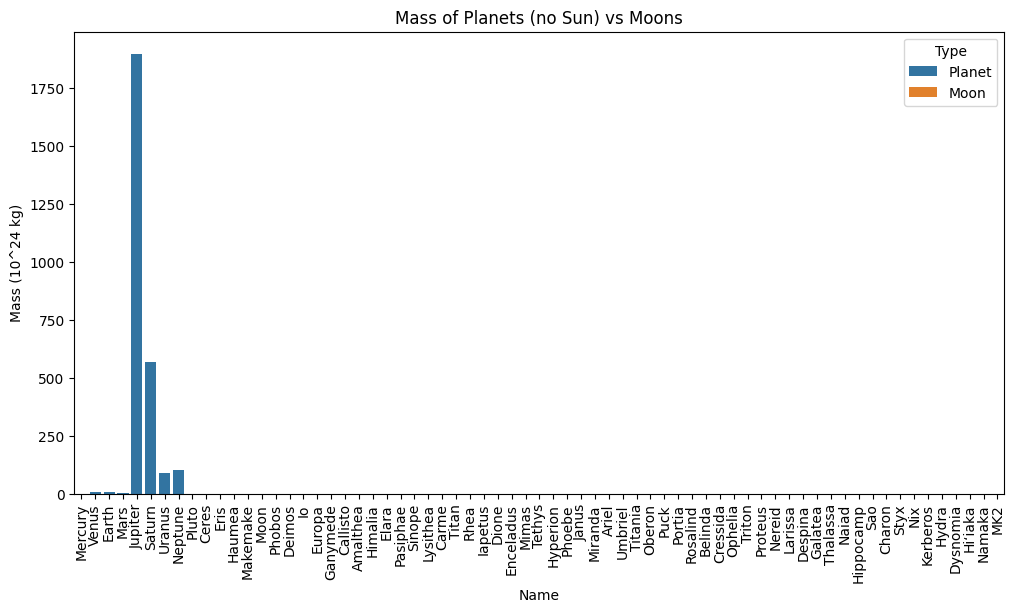

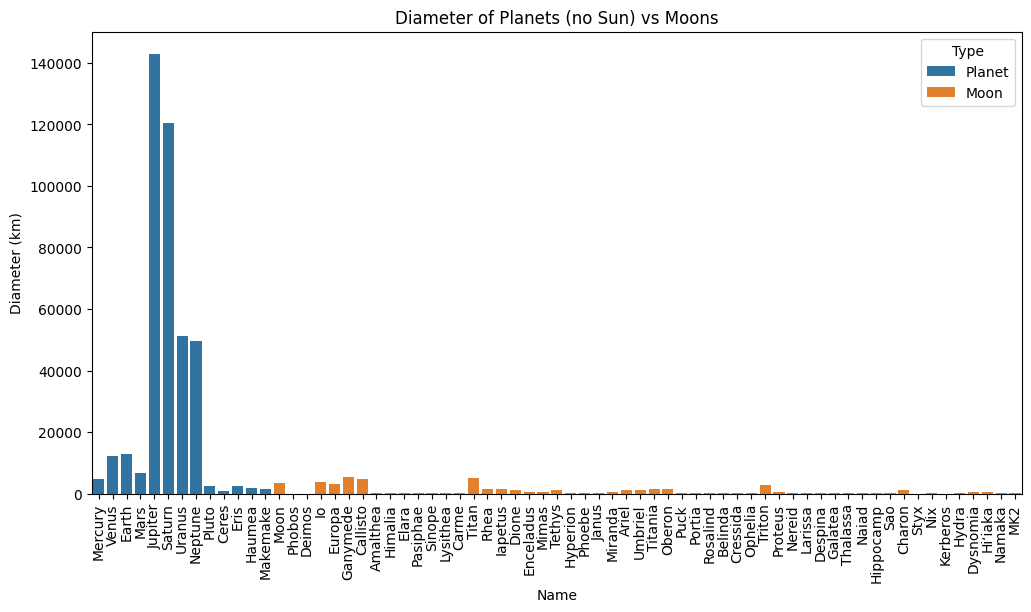

In [29]:
# Prepare combined dataset
planets_plot = planets_no_sun.copy()
planets_plot['Type'] = 'Planet'

moons_plot = Moons.copy()
moons_plot['Type'] = 'Moon'

columns_of_interest = ['Name', 'Mass_(10^24kg)', 'Diameter_(km)', 'Density_(kg/m^3)', 'Surface_Gravity_(m/s^2)', 'Type']
combined = pd.concat([planets_plot[columns_of_interest], moons_plot[columns_of_interest]])

# Mass comparison
plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='Mass_(10^24kg)', hue='Type', data=combined)
plt.xticks(rotation=90)
plt.title("Mass of Planets (no Sun) vs Moons")
plt.ylabel("Mass (10^24 kg)")
plt.show()

# Diameter comparison
plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='Diameter_(km)', hue='Type', data=combined)
plt.xticks(rotation=90)
plt.title("Diameter of Planets (no Sun) vs Moons")
plt.ylabel("Diameter (km)")
plt.show()

C:\Users\Jelle\AppData\Local\Temp\ipykernel_32364\2418461193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planets_no_sun['DistanceAU'] = planets_no_sun['Distance_from_Sun_(10^6_km)'] * 1e6 / 149597870.7


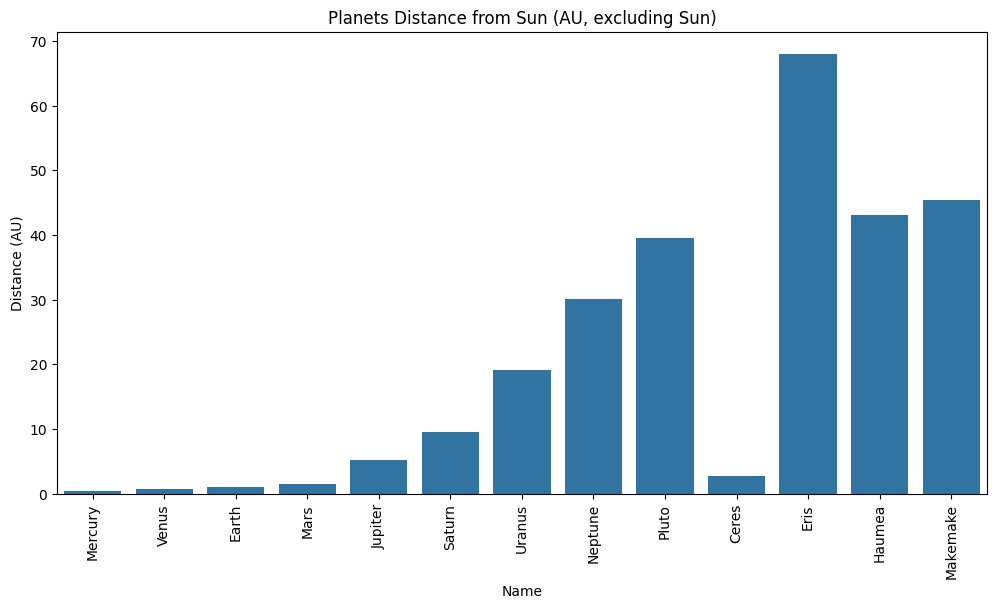

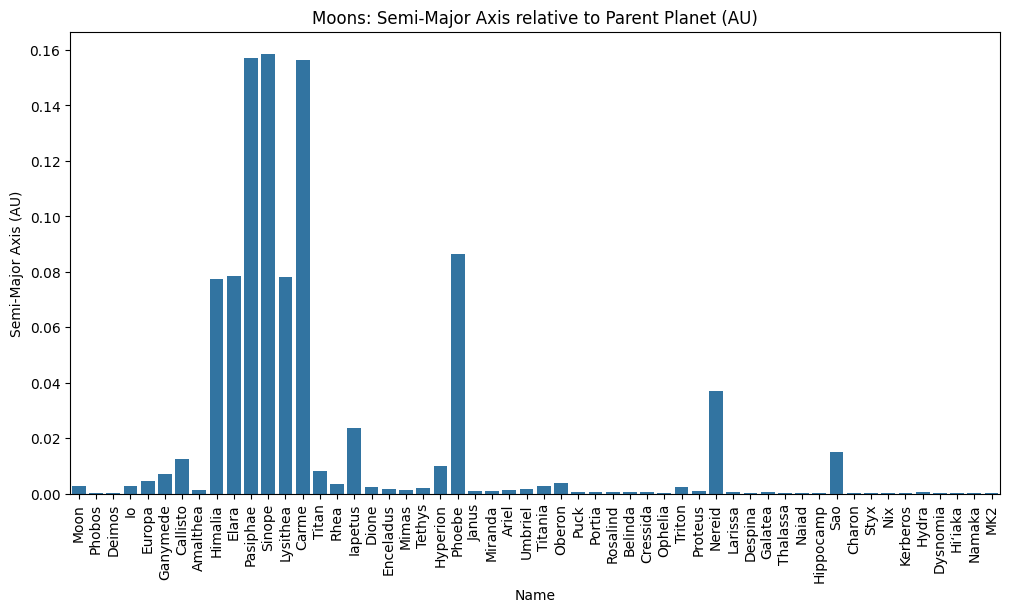

In [30]:
# 1Convert distances to AU for consistency
# 1 AU = 149597870.7 km
planets_no_sun['DistanceAU'] = planets_no_sun['Distance_from_Sun_(10^6_km)'] * 1e6 / 149597870.7
Moons['SemiMajorAxisAU'] = Moons['SemiMajorAxisKm'] / 149597870.7

# Plot planets distance from Sun in AU
plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='DistanceAU', data=planets_no_sun)
plt.xticks(rotation=90)
plt.title("Planets Distance from Sun (AU, excluding Sun)")
plt.ylabel("Distance (AU)")
plt.show()

# Plot moons distance from their parent planet in AU
plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='SemiMajorAxisAU', data=Moons)
plt.xticks(rotation=90)
plt.title("Moons: Semi-Major Axis relative to Parent Planet (AU)")
plt.ylabel("Semi-Major Axis (AU)")
plt.show()


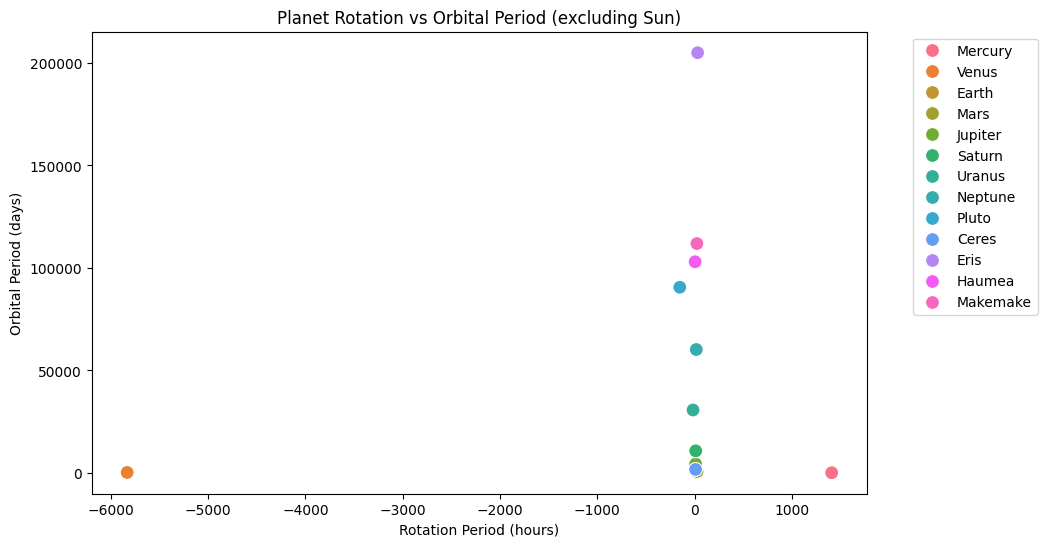

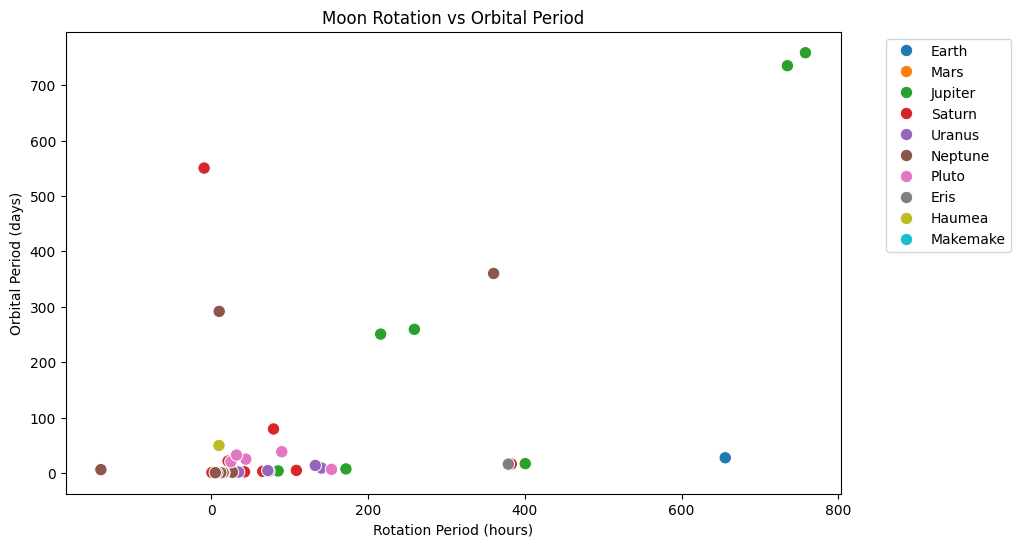

In [31]:
# Planet rotation vs orbital period (no Sun)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rotation_Period_(hours)', y='Orbital_Period_(days)', data=planets_no_sun, hue='Name', s=100)
plt.title("Planet Rotation vs Orbital Period (excluding Sun)")
plt.xlabel("Rotation Period (hours)")
plt.ylabel("Orbital Period (days)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Moon rotation vs orbital period
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rotation_Period_(hours)', y='Orbital_Period_(days)', data=Moons, hue='Parent', s=80)
plt.title("Moon Rotation vs Orbital Period")
plt.xlabel("Rotation Period (hours)")
plt.ylabel("Orbital Period (days)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


In [32]:
Relationships_end = time.time()
Relationships_elapsed = Relationships_end - Relationships_start

## 5) Visualize the solar system

In [33]:
# =============================
#  Visualize section
# =============================
Visualize_start = time.time()

C:\Users\Jelle\AppData\Local\Temp\ipykernel_32364\3780702431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planets_no_sun['DistanceAU'] = planets_no_sun['Distance_from_Sun_(10^6_km)']*1e6 / 149597870.7


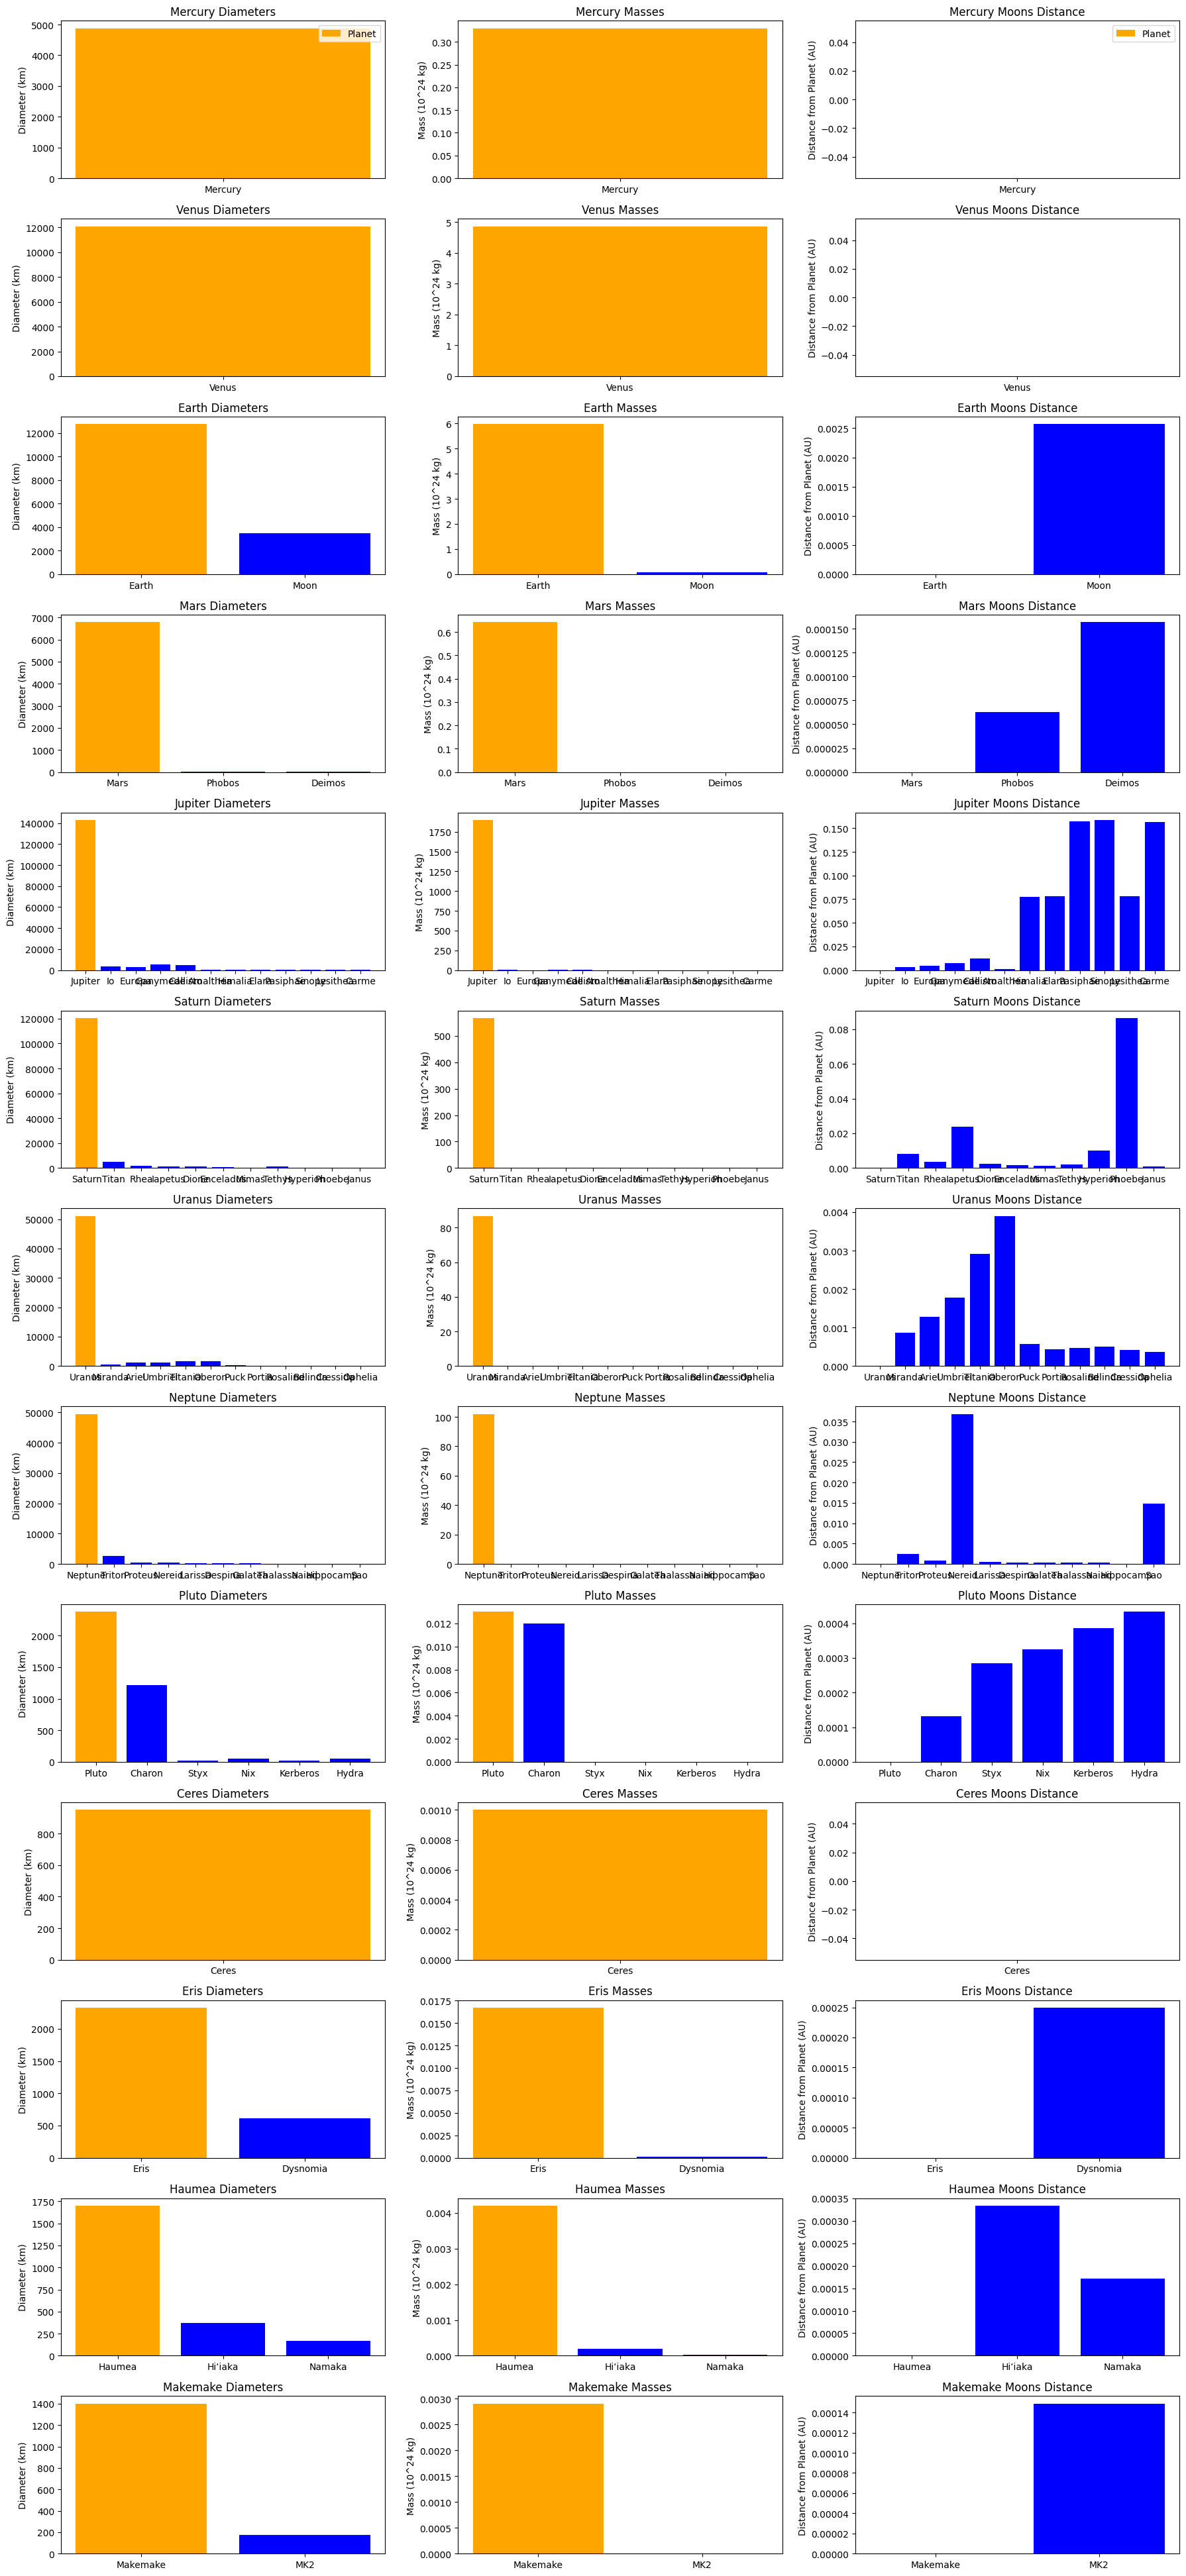

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove Sun
planets_no_sun = Planets[Planets['Name'] != 'Sun']

# Convert distances to AU
planets_no_sun['DistanceAU'] = planets_no_sun['Distance_from_Sun_(10^6_km)']*1e6 / 149597870.7
Moons['SemiMajorAxisAU'] = Moons['SemiMajorAxisKm'] / 149597870.7

# Link moons to their parent planet
planet_moons = {planet: Moons[Moons['Parent']==planet] for planet in planets_no_sun['Name']}

# Subplots per planet
num_planets = len(planets_no_sun)
fig, axes = plt.subplots(num_planets, 3, figsize=(18, num_planets*3))  # 3 columns: Diameter, Mass, Distance

for i, planet_name in enumerate(planets_no_sun['Name']):
    planet_data = planets_no_sun[planets_no_sun['Name']==planet_name].iloc[0]
    moons_data = planet_moons[planet_name]

    # --- 1️⃣ Diameter subplot ---
    ax_d = axes[i, 0]
    ax_d.bar(planet_name, planet_data['Diameter_(km)'], color='orange', label='Planet')
    if not moons_data.empty:
        ax_d.bar(moons_data['Name'], moons_data['Diameter_(km)'], color='blue', label='Moon')
    ax_d.set_ylabel("Diameter (km)")
    ax_d.set_title(f"{planet_name} Diameters")
    if i == 0:
        ax_d.legend()

    # --- 2️⃣ Mass subplot ---
    ax_m = axes[i, 1]
    ax_m.bar(planet_name, planet_data['Mass_(10^24kg)'], color='orange')
    if not moons_data.empty:
        ax_m.bar(moons_data['Name'], moons_data['Mass_(10^24kg)'], color='blue')
    ax_m.set_ylabel("Mass (10^24 kg)")
    ax_m.set_title(f"{planet_name} Masses")

    # --- 3️⃣ Distance subplot ---
    ax_dist = axes[i, 2]
    ax_dist.bar(planet_name, 0, color='orange', label='Planet')  # planet at 0 relative distance
    if not moons_data.empty:
        ax_dist.bar(moons_data['Name'], moons_data['SemiMajorAxisAU'], color='blue', label='Moon')
    ax_dist.set_ylabel("Distance from Planet (AU)")
    ax_dist.set_title(f"{planet_name} Moons Distance")
    if i == 0:
        ax_dist.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [35]:
# --- put your "drop/ignore" code here ---
Visualize_end = time.time()
Visualize_elapsed = Visualize_end - Visualize_start

## 6) Mini Solar System

In [36]:
# =============================
# Visualize section
# =============================
Mini_Solar_System_start = time.time()

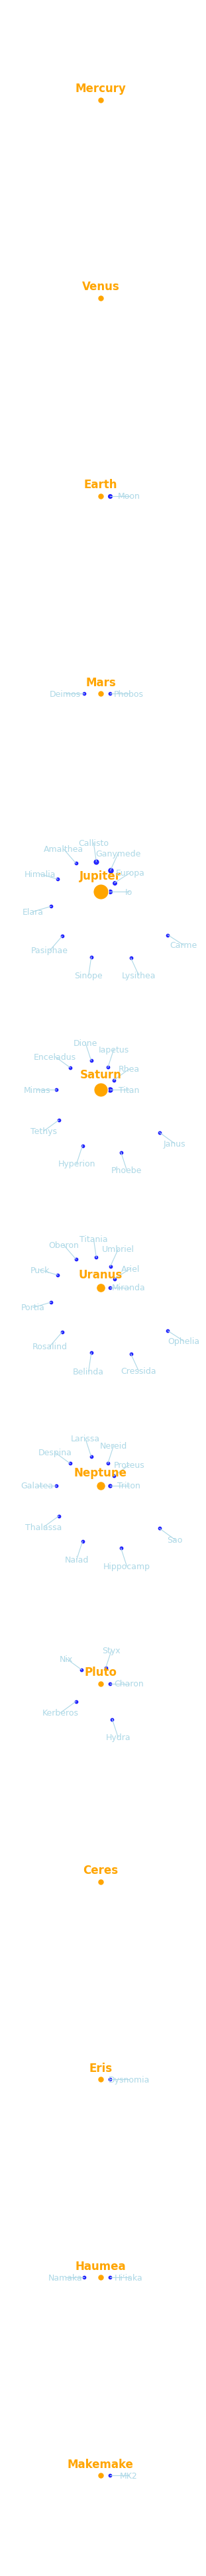

In [37]:
# Only planets (no Sun)
planets_only = Planets[Planets['Name'] != 'Sun']

fig, axes = plt.subplots(len(planets_only), 1, figsize=(12, 3*len(planets_only)))
if len(planets_only) == 1:
    axes = [axes]  # make iterable if only one planet

for ax, (_, planet) in zip(axes, planets_only.iterrows()):
    ax.set_aspect('equal')
    ax.set_facecolor('k')
    
    # Draw planet at center
    planet_size = max(planet['Diameter_(km)']/500, 50)
    ax.scatter(0, 0, s=planet_size, color='orange', edgecolors='white', zorder=5)
    
    # Label planet above
    ax.text(0, planet_size**0.5*0.01 + 0.05, planet['Name'], color='orange', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Draw moons around planet
    moons_of_planet = Moons[Moons['Parent'] == planet['Name']]
    num_moons = len(moons_of_planet)
    for i, (_, moon) in enumerate(moons_of_planet.iterrows()):
        r = 0.2 + i*0.15
        angle = np.linspace(0, 2*np.pi, num_moons+1)[i]
        x, y = r*np.cos(angle), r*np.sin(angle)
        moon_size = max(moon['Diameter_(km)']/200, 10)
        ax.scatter(x, y, s=moon_size, color='blue', alpha=0.8)
        
        # Curved leader line to label
        offset = 0.4  # farther away from moon
        label_x, label_y = x + offset*np.cos(angle), y + offset*np.sin(angle)
        line_x = np.linspace(x, label_x, 5)
        line_y = np.linspace(y, label_y, 5)
        ax.plot(line_x, line_y, color='lightblue', lw=0.8)
        
        # Moon name at end of line
        ax.text(label_x, label_y, moon['Name'], color='lightblue', fontsize=9, ha='center', va='center')
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [38]:
# --- put your "drop/ignore" code here ---
Mini_Solar_System_end = time.time()
Mini_Solar_System_elapsed = Mini_Solar_System_end - Mini_Solar_System_start

---
## Notebook Runtime
---

In [39]:
# =============================
# TOTAL RUNTIME SUMMARY
# =============================
total_end = time.time()
total_elapsed = total_end - total_start

# --- CALCULATE PERCENTAGES ---
prep_pct = (prep_elapsed / total_elapsed) * 100
Connect_pct = (Connect_elapsed / total_elapsed) * 100
Relationship_pct = (Relationships_elapsed / total_elapsed) * 100
Visualize_pct = (Visualize_elapsed / total_elapsed) * 100
Mini_Solar_system_pct = (Mini_Solar_System_elapsed / total_elapsed) * 100

# --- PRINT FINAL SUMMARY ---
print("🌌 Notebook Runtime Summary 🌌")
print(f"📦 Data Preparation       : {prep_elapsed:.2f} sec ({prep_pct:.2f}%)")
print(f"🔗 Connect Planets & Moons: {Connect_elapsed:.2f} sec ({Connect_pct:.2f}%)")
print(f"📊 Relationships Analysis : {Relationships_elapsed:.2f} sec ({Relationship_pct:.2f}%)")
print(f"🖼️ Visualization          : {Visualize_elapsed:.2f} sec ({Visualize_pct:.2f}%)")
print(f"🚀 Mini Solar System      : {Mini_Solar_System_elapsed:.2f} sec ({Mini_Solar_system_pct:.2f}%)")
print(f"⏱️ Total runtime           : {total_elapsed:.2f} sec")
print(f"🕒 Finished at            : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


🌌 Notebook Runtime Summary 🌌
📦 Data Preparation       : 0.18 sec (2.91%)
🔗 Connect Planets & Moons: 0.07 sec (1.12%)
📊 Relationships Analysis : 1.64 sec (26.13%)
🖼️ Visualization          : 3.63 sec (58.04%)
🚀 Mini Solar System      : 0.69 sec (10.97%)
⏱️ Total runtime           : 6.26 sec
🕒 Finished at            : 2025-11-27 14:05:57
